Description:
This analysis is done for the purpose of finding a region to set up Chinese food truck business in Hyderabad city.
Dataset is taken from Zomato which consists of ['NAME', 'PRICE', 'CITY', 'REGION', 'URL', 'PAGE NO', 'CUSINE TYPE','TIMING', 'RATING_TYPE', 'RATING', 'VOTES', 'CUSINE_CATEGORY'] for different restaurants registered with Zomato.

In [15]:
import pandas as pd
import os
import pandas_profiling as pp
import re
import sys
import warnings
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 1000000)

# cleansing data

In [6]:
def filter_data(path):
    """
    This function filters the column REGION according to the regex.Regex can be changed according to the input data
    Parameters:
    path : location where input data is present
    """
    warnings.filterwarnings("ignore")
    data=pd.DataFrame()
    for files in os.listdir(path):
        src=path+str(files)
        data1=pd.read_csv(src,header=0,sep="|")
        data=data.append(data1,ignore_index=True)
    data1=data.copy()
    for i in range(len(data1['REGION'])):
        x=re.findall(".*-- (.*)-- (.*)|.*-- (.*)",data1['REGION'][i])
        if x!=[]:
            if x[0][0]!='':
                data1['REGION'][i]=x[0][1]
            elif  (x[0][0]=='') & (x[0][2]!=''):
                data1['REGION'][i]=x[0][2]
    new_df = pd.DataFrame(data1.CUSINE_CATEGORY.str.split(',',expand=True).stack().reset_index(level=1,drop=True))
    del data1['CUSINE_CATEGORY']
    new_df.columns=['CUSINE_CATEGORY']
    data1=data1.join(new_df)
    data1=data1.reset_index(drop=True)
    return data1
path="E:\\python\\projects\\pandas-master\\datasets\Hyderabad\\"
filtered_data=filter_data(path)


# data profile report 

In [7]:
def overview_report(data):
    """
    This fucntions creates a html report which describes the input data.
    Parameters:
    data : dataframe for which report need to be generated
    """
    profile = data.profile_report(title="analysis report")
    profile.to_file(output_file="overview.html")
overview_report(filtered_data)

# analysis

In [8]:
filtered_data.columns

Index(['NAME', 'PRICE', 'CITY', 'REGION', 'URL', 'PAGE NO', 'CUSINE TYPE',
       'TIMING', 'RATING_TYPE', 'RATING', 'VOTES', 'CUSINE_CATEGORY'],
      dtype='object')

In [20]:
#filter_region=filtered_data[filtered_data["REGION"]=="Gachibowli"]
#print(filtered_data[filtered_data["REGION"]=="Gachibowli"]["NAME"].nunique())
#for i in filtered_data[filtered_data["REGION"]=="Gachibowli"]["NAME"].unique(): 
#    print(i)
#filter_region["CUSINE_CATEGORY"].value_counts().plot(kind='barh',figsize=(20,50))
#pd.pivot_table(filter_region,index=["CUSINE TYPE"],values=["CITY"],aggfunc=["count"]).plot(kind='bar',figsize=(10,10))

In [9]:
filter_cusine_type=filtered_data[filtered_data["CUSINE TYPE"] =="Food Truck"]
filter_cusine_type["CUSINE TYPE"].value_counts()

Food Truck    44
Name: CUSINE TYPE, dtype: int64

<AxesSubplot:xlabel='REGION'>

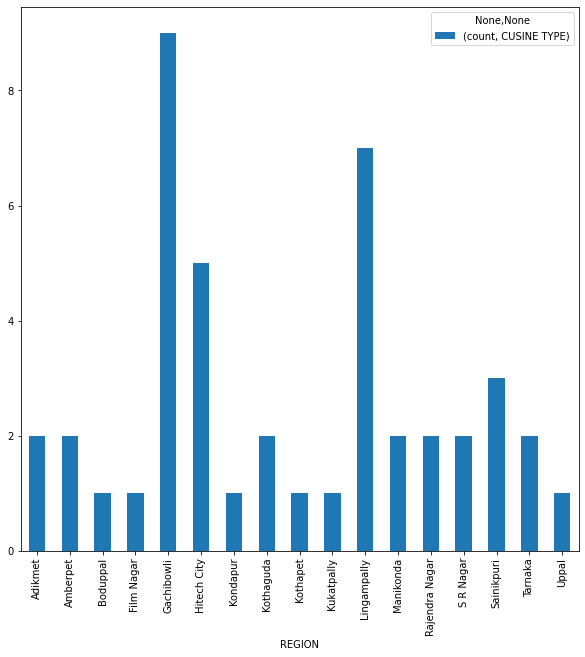

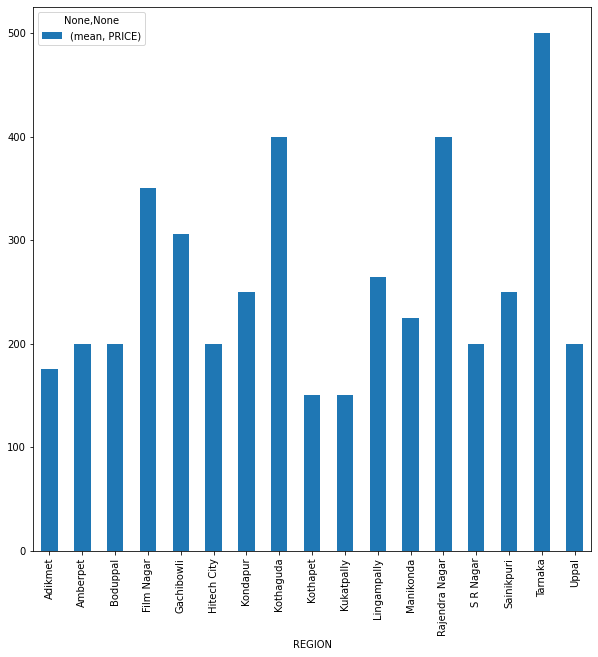

In [10]:
x=filter_cusine_type.groupby("REGION").count()["CUSINE TYPE"]
pd.pivot_table(filter_cusine_type,index=["REGION"],values=["CUSINE TYPE"],aggfunc=["count"]).plot(kind='bar',figsize=(10,10))
y=filter_cusine_type.groupby("REGION").mean()["PRICE"]
pd.pivot_table(filter_cusine_type,index=["REGION"],values=["PRICE"],aggfunc=["mean"]).plot(kind='bar',figsize=(10,10))

<AxesSubplot:ylabel='REGION,RATING_TYPE,RATING'>

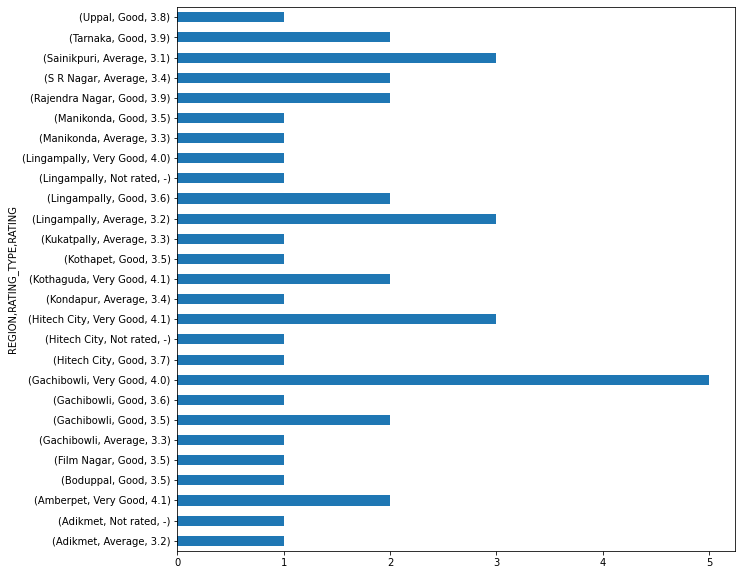

In [11]:
w=filter_cusine_type.groupby(["REGION","RATING_TYPE","RATING"]).count()["CUSINE TYPE"]
w.plot(kind='barh',figsize=(10,10))

In [13]:
z=pd.DataFrame(filter_cusine_type.groupby(["REGION","RATING_TYPE"]).first())

z[["CUSINE_CATEGORY","TIMING","NAME","RATING"]]

CUSINE_CATEGORY  \
REGION         RATING_TYPE                     
Adikmet        Average          South Indian   
               Not rated        Healthy Food   
Amberpet       Very Good               Rolls   
Boduppal       Good             South Indian   
Film Nagar     Good             North Indian   
Gachibowli     Average          South Indian   
               Good             South Indian   
               Very Good    Charcoal Chicken   
Hitech City    Good             South Indian   
               Not rated             Arabian   
               Very Good            Desserts   
Kondapur       Average                   BBQ   
Kothaguda      Very Good        North Indian   
Kothapet       Good             South Indian   
Kukatpally     Average          South Indian   
Lingampally    Average          South Indian   
               Good                   Burger   
               Not rated             Chinese   
               Very Good        South Indian   
Manikonda      Average          South Indian   
               Good             South Indian   
Rajendra Nagar Good              Continental   
S R Nagar      Average             Ice Cream   
Sainikpuri     Average                 Kebab   
Tarnaka        Good                      BBQ   
Uppal          Good             South Indian   

                                                                 TIMING  \
REGION         RATING_TYPE                                                
Adikmet        Average                 5pm to 10pm(Mon-Sat),Closed(Sun)   
               Not rated                           7am to 11pm(Mon-Sun)   
Amberpet       Very Good                         5pm to 1030pm(Mon-Sun)   
Boduppal       Good                              530pm to 11pm(Mon-Sun)   
Film Nagar     Good                              5pm to 1130pm(Mon-Sun)   
Gachibowli     Average                             7am to 11pm(Mon-Sun)   
               Good                              7am to 1130pm(Mon-Sun)   
               Very Good                           5pm to 11pm(Mon-Sun)   
Hitech City    Good                7am to 11am,430pm to 1145pm(Mon-Sun)   
               Not rated               4pm to 1030pm(Mon-Fri),(Sat-Sun)   
               Very Good                          11am to 11pm(Mon-Sun)   
Kondapur       Average                     530pm to 12midnight(Mon-Sun)   
Kothaguda      Very Good       330pm to 1am(Mon,Wed,Thu,Fri,Sat,Sun)...   
Kothapet       Good                              5pm to 1130pm(Mon-Sun)   
Kukatpally     Average           6am to 1130am,730pm to 1130pm(Mon-Sun)   
Lingampally    Average                  8am to 3pm,7pm to 11pm(Mon-Sun)   
               Good                                6pm to 11pm(Mon-Sun)   
               Not rated                           6am to 11pm(Mon-Sun)   
               Very Good               Closed(Mon),5pm to 11pm(Tue-Sun)   
Manikonda      Average      6am to 11am(Mon-Fri),6am to 12noon(Sat-Sun)   
               Good                              730am to 11pm(Mon-Sun)   
Rajendra Nagar Good                    Closed(Mon),4pm to 10pm(Tue-Sun)   
S R Nagar      Average                           12noon to 2am(Mon-Sun)   
Sainikpuri     Average                             6pm to 11pm(Mon-Sun)   
Tarnaka        Good           8pm to 1144pm(Mon),8pm to 1145pm(Tue-Sun)   
Uppal          Good                              4pm to 1130pm(Mon-Sun)   

                                                     NAME RATING  
REGION         RATING_TYPE                                        
Adikmet        Average                          Dosa Kart    3.2  
               Not rated    Nakshatras Healthy Nutri Food      -  
Amberpet       Very Good                       Rollarappa    4.1  
Boduppal       Good                           Dosa Palace    3.5  
Film Nagar     Good               Parathawalas And Grills    3.5  
Gachibowli     Average                  Taste of Godavari    3.3  
               Good                          Do

In [14]:
filter_cusine_type.groupby(["REGION","RATING_TYPE","RATING"]).first()

NAME  PRICE  \
REGION         RATING_TYPE RATING                                         
Adikmet        Average     3.2                         Dosa Kart    200   
               Not rated   -       Nakshatras Healthy Nutri Food    150   
Amberpet       Very Good   4.1                        Rollarappa    200   
Boduppal       Good        3.5                       Dosa Palace    200   
Film Nagar     Good        3.5           Parathawalas And Grills    350   
Gachibowli     Average     3.3                 Taste of Godavari    300   
               Good        3.5                      Dosa Station    150   
                           3.6                Delicio Taco Truck    250   
               Very Good   4.0               Sholay The BBQ Bike    350   
Hitech City    Good        3.7                          Idly.com    200   
               Not rated   -          Gafoor Bhai Shawarma Gaadi    200   
               Very Good   4.1                       Mycreamchip    200   
Kondapur       Average     3.4                        Street BBQ    250   
Kothaguda      Very Good   4.1                 The Kingz Landing    400   
Kothapet       Good        3.5                      Eat And Walk    150   
Kukatpally     Average     3.3                     Aaha Kitchens    150   
Lingampally    Average     3.2                        Apna Zaika    150   
               Good        3.6                  The Burger Chefs    400   
               Not rated   -                             Hot Box    300   
               Very Good   4.0                        Dosa Place    300   
Manikonda      Average     3.3                        Just Smack    200   
               Good        3.5                    Minerva Xpress    250   
Rajendra Nagar Good        3.9                         Le Bistro    400   
S R Nagar      Average     3.4                       Creamstruck    200   
Sainikpuri     Average     3.1              Naan Stop Food Truck    250   
Tarnaka        Good        3.9            The Spitfire BBQ Truck    500   
Uppal          Good        3.8     New Karthikeya Tiffins Centre    200   

                                        CITY  \
REGION         RATING_TYPE RATING              
Adikmet        Average     3.2     Hyderabad   
               Not rated   -       Hyderabad   
Amberpet       Very Good   4.1     Hyderabad   
Boduppal       Good        3.5     Hyderabad   
Film Nagar     Good        3.5     Hyderabad   
Gachibowli     Average     3.3     Hyderabad   
               Good        3.5     Hyderabad   
                           3.6     Hyderabad   
               Very Good   4.0     Hyderabad   
Hitech City    Good        3.7     Hyderabad   
               Not rated   -       Hyderabad   
               Very Good   4.1     Hyderabad   
Kondapur       Average     3.4     Hyderabad   
Kothaguda      Very Good   4.1     Hyderabad   
Kothapet       Good        3.5     Hyderabad   
Kukatpally     Average     3.3     Hyderabad   
Lingampally    Average     3.2     Hyderabad   
               Good        3.6     Hyderabad   
               Not rated   -       Hyderabad   
               Very Good   4.0     Hyderabad   
Manikonda      Average     3.3     Hyderabad   
               Good        3.5     Hyderabad   
Rajendra Nagar Good        3.9     Hyderabad   
S R Nagar      Average     3.4     Hyderabad   
Sainikpuri     Average     3.1     Hyderabad   
Tarnaka        Good        3.9     Hyderabad   
Uppal          Good        3.8     Hyderabad   

                                                                                 URL  \
REGION         RATING_TYPE RATING                                                      
Adikmet        Average     3.2      https://www.zomato.com/dosa-kart-food-truck/info   
               Not rated   -       https://www.zomato.com/hyderabad/nakshatras-he...   
Amberpet       Very Good   4.1     https://www.zomato.com/rollarappa-food-truck/info   
Boduppal       Good        3.5     https://www.zoma